In [2]:
import pandas as pd
import numpy as np
import glob
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# selecting metabs with proper and consistent signals across the batches

metabs = ['Acetoacetate', 'Acetyl-Threonine', 'Adenine', 'Arabitol', 'Arginine', 'Asparagine', 'Biotin', 'Serine','Aspartate',
         'Fumarate', 'Glucose','Alanine','Alpha Ketoglutarate',
       'Glucose-6-Phosphate', 'Glutamine','Trehalose','Glutamine','Glutamate',
       'Hippurate', 'Histidine', 'Hypoxanthine', 'Inosine',
       'Itaconate', 'Methionine', 'Methionine Sulfoxide', 'N-Acetyl-Aspartate',
       'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine',
       'N-Acetyl-Glycine', 'N-Acetyl-Leucine', 'N-Acetyl-Methionine',
       'N-Acetyl-Phenylalanine', 'Nicotinate', 'O-Phospho-L-Serine', 'Panthothenic acid', 'Phenylalanine',
       'Pyridoxine', 'Rhamnose', 'Riboflavin', 'Shikimate',
       'Succinate',  'Threonine', 'Thymidine', 'Thymine', 'Uridine',
       'Urocanate',  'Xanthine', 'Xanthosine']

In [4]:
data_conc = pd.read_csv('tables/LSARP-SA017-SA028_concentrations.csv')
data_conc['BI_NBR'] = 'NA'
data_conc.loc[data_conc.SType == 'Bi', 'BI_NBR'] = data_conc.ms_file[data_conc.SType == 'Bi'].apply(lambda x: x[-10:])
data_conc.head()

,ms_file,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine,Adenosine monophosphate,Alanine,Alpha Ketoglutarate,Arabitol,Arginine,...,Uridine,Urocanate,Valine,Xanthine,Xanthosine,Date,Col,SType,Batch,BI_NBR
0,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00001_SG...,0.283403,0.046277,0.013578,2.183840e-17,3.099134e-17,2.931054e-15,7.421163e-17,7.542042e-02,3.219431e-01,...,6.139337e-03,0.003599,3.824083e+00,0.003005,9.699032e-03,210824,Col01,Blank,SA017,NA
1,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00002_SG...,0.040380,0.017092,0.001980,2.183840e-17,3.099134e-17,2.931054e-15,7.421163e-17,1.470693e-02,4.178827e-17,...,6.550607e-19,0.002114,7.130321e-16,0.001437,6.577019e-19,210824,Col01,Blank,SA017,NA
2,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00003_SG...,0.035640,0.009188,0.003985,2.183840e-17,3.099134e-17,2.931054e-15,7.421163e-17,1.295737e-02,4.178827e-17,...,6.550607e-19,0.002906,7.130321e-16,0.002125,6.577019e-19,210824,Col01,Blank,SA017,NA
3,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00004_SG...,0.038612,0.001827,0.001884,2.183840e-17,3.099134e-17,2.931054e-15,7.421163e-17,2.771006e-18,4.178827e-17,...,6.550607e-19,0.001572,2.493973e+00,0.001285,6.577019e-19,210824,Col01,Blank,SA017,NA
4,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00005_A1...,0.065213,0.043932,0.006182,2.183840e-17,3.099134e-17,2.931054e-15,7.421163e-17,3.877143e-02,4.178827e-17,...,4.637768e-03,0.007503,7.130321e-16,0.004208,4.316968e-03,210824,Col01,Std,SA017,NA


In [5]:
data_conc.sort_values(by = ['Col', 'Batch'], inplace = True)
data_conc = data_conc[data_conc.Col == 'Col02']

In [6]:
data_conc.columns

Index(['ms_file', 'Acetoacetate', 'Acetyl-Threonine', 'Adenine', 'Adenosine',
       'Adenosine monophosphate', 'Alanine', 'Alpha Ketoglutarate', 'Arabitol',
       'Arginine', 'Asparagine', 'Aspartate', 'Biotin', 'Carnosine',
       'Citrulline', 'Creatinine', 'Cysteic Acid', 'Cysteine', 'Cystine',
       'Cytidine', 'Cytosine', 'DihydroOrotate', 'Folate',
       'Fructose1-6 Bisphosphate', 'Fumarate', 'Glucose',
       'Glucose-6-Phosphate', 'Glutamate', 'Glutamine', 'Guanine', 'Guanosine',
       'Hippurate', 'Histidine', 'Hypoxanthine', 'Inosine', 'Isoleucine',
       'Itaconate', 'Leucine', 'Lysine', 'Methionine', 'Methionine Sulfoxide',
       'Mevalonate acid', 'Myoinositol', 'N-Acetyl-Aspartate',
       'N-Acetyl-Glucosamine', 'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine',
       'N-Acetyl-Glycine', 'N-Acetyl-Leucine', 'N-Acetyl-Methionine',
       'N-Acetyl-Phenylalanine', 'Nicotinate', 'O-Phospho-L-Serine',
       'Ornithine', 'Orotate', 'Panthothenic acid', 'Phenylalanine', 'Pr

In [7]:
data_consumption = data_conc.copy()
for col in  data_consumption.columns[1:-5]:
    data_consumption[col] = data_consumption[col] - np.mean(data_consumption.loc[(data_consumption.SType == 'MHPool') & (data_consumption[col] > 0.0000000001) , col])
# data_consumption.to_csv('data_consumption_negative_mode_with_concentrations.csv')


    
consumption_resume = pd.DataFrame()
consumption_resume['Compound'] = data_consumption.columns[1:-5]
consumption_resume['Flux_mean'] = 0
consumption_resume['Std'] = 0

for cp in consumption_resume.Compound:
    consumption_resume.loc[consumption_resume.Compound == cp, 'Flux_mean'] = np.mean(data_consumption[cp][(data_consumption.SType == 'Bi')])
    consumption_resume.loc[consumption_resume.Compound == cp, 'Std'] = np.std(data_consumption[cp][data_consumption.SType == 'Bi'])/np.sqrt(len(data_consumption[cp][data_consumption.SType == 'Bi']))

consumption_resume['Flux_min'] = consumption_resume.Flux_mean - consumption_resume.Std
consumption_resume['Flux_max'] = consumption_resume.Flux_mean + consumption_resume.Std

consumption_resume.to_csv('tables/resume_consumption_negative_mode_with_concentrations.csv')

In [8]:
fluxes = consumption_resume.sort_values(by = 'Flux_mean').reset_index(drop = True)[['Compound', 'Flux_mean', 'Std', 'Flux_min', 'Flux_max']]#.dropna(axis = 0)
fluxes

,Compound,Flux_mean,Std,Flux_min,Flux_max
0,Serine,-86.133048,1.437263,-87.570311,-84.695784
1,Arginine,-54.623771,0.779777,-55.403548,-53.843995
2,Trehalose,-52.288204,0.619811,-52.908015,-51.668392
3,Threonine,-31.409624,0.782688,-32.192312,-30.626936
4,Lysine,-21.570932,1.960209,-23.531141,-19.610723
...,...,...,...,...,...
72,Isoleucine,13.486296,1.822653,11.663643,15.308949
73,Leucine,13.671322,1.847659,11.823663,15.518981
74,Cysteine,NaN,NaN,NaN,NaN
75,Folate,NaN,NaN,NaN,NaN


In [9]:
fluxes = fluxes[fluxes.Compound.apply(lambda x: x in metabs)]

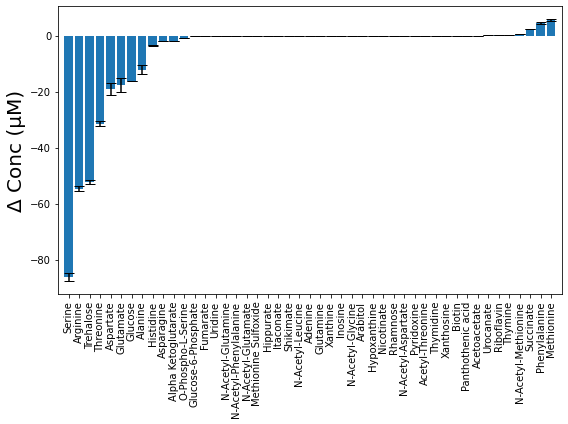

In [10]:
materials = np.array(fluxes.Compound)
x_pos = range(len(fluxes))
CTEs = np.array(fluxes.Flux_mean)
error = np.array(fluxes.Std)


fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(x_pos, CTEs, yerr=error,   ecolor='black', capsize=5)
ax.set_ylabel('Δ Conc (μM)', fontsize = 20)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation = 90)
# ax.yaxis.grid(True)

# Save the figure and show
plt.xlim(-1,len(fluxes))
# plt.yscale('log')
plt.tight_layout()
plt.savefig('consumption_plots/bar_plot_with_error_bars_normalized_consumption_with_concentrations.png', dpi = 700)
plt.show()